In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


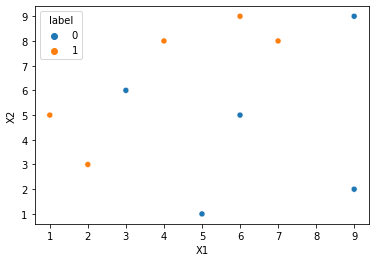

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
#STUMP

from sklearn.tree import DecisionTreeClassifier

In [7]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [8]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [10]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [11]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

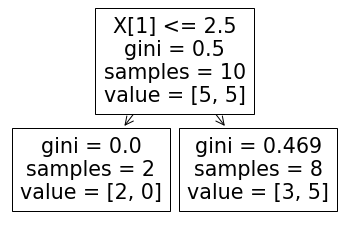

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


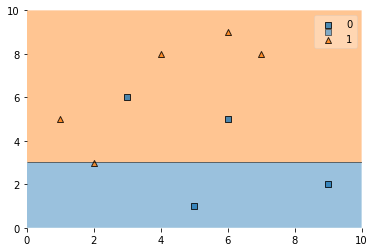

In [13]:
plot_decision_regions(x,y,clf=dt1,legend=True)

In [14]:
df['y_pred'] = dt1.predict(x)
df['y_pred']

0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    0
Name: y_pred, dtype: int64

In [15]:
df

,X1,X2,label,y_pred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,1
3,4,8,1,1
4,5,1,0,0
5,6,9,1,1
6,6,5,0,1
7,7,8,1,1
8,9,9,0,1
9,9,2,0,0


In [16]:
df.shape

(10, 4)

In [17]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,y_pred,weights
0,1,5,1,1,0.1
1,2,3,1,1,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,1,0.1
6,6,5,0,1,0.1
7,7,8,1,1,0.1
8,9,9,0,1,0.1
9,9,2,0,0,0.1


In [18]:
def calculate_weights_error(error):
    return 0.5*np.log((1-error)/error)

In [19]:
 calculate_weights_error(0.3)

0.42364893019360184

In [20]:
def update_weight(row,error=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-error)
    else:
        return row['weights']*np.exp(error)
    

In [21]:
df['update_weights']=df.apply(update_weight,axis=1)
df

,X1,X2,label,y_pred,weights,update_weights
0,1,5,1,1,0.1,0.065508
1,2,3,1,1,0.1,0.065508
2,3,6,0,1,0.1,0.152653
3,4,8,1,1,0.1,0.065508
4,5,1,0,0,0.1,0.065508
5,6,9,1,1,0.1,0.065508
6,6,5,0,1,0.1,0.152653
7,7,8,1,1,0.1,0.065508
8,9,9,0,1,0.1,0.152653
9,9,2,0,0,0.1,0.065508


In [22]:
df['update_weights'].sum()

0.9165153319682015

In [23]:
df['normalized_weights'] = df['update_weights']/df['update_weights'].sum()

In [24]:
df

,X1,X2,label,y_pred,weights,update_weights,normalized_weights
0,1,5,1,1,0.1,0.065508,0.071475
1,2,3,1,1,0.1,0.065508,0.071475
2,3,6,0,1,0.1,0.152653,0.166559
3,4,8,1,1,0.1,0.065508,0.071475
4,5,1,0,0,0.1,0.065508,0.071475
5,6,9,1,1,0.1,0.065508,0.071475
6,6,5,0,1,0.1,0.152653,0.166559
7,7,8,1,1,0.1,0.065508,0.071475
8,9,9,0,1,0.1,0.152653,0.166559
9,9,2,0,0,0.1,0.065508,0.071475


In [25]:
df['normalized_weights'].sum()

1.0

In [26]:
df['cumsum'] = np.cumsum(df['normalized_weights'])
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [27]:
df

,X1,X2,label,y_pred,weights,update_weights,normalized_weights,cumsum,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.142950,0.071475
2,3,6,0,1,0.1,0.152653,0.166559,0.309508,0.309508,0.142950
3,4,8,1,1,0.1,0.065508,0.071475,0.380983,0.380983,0.309508
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.452458,0.380983
5,6,9,1,1,0.1,0.065508,0.071475,0.523933,0.523933,0.452458
6,6,5,0,1,0.1,0.152653,0.166559,0.690492,0.690492,0.523933
7,7,8,1,1,0.1,0.065508,0.071475,0.761967,0.761967,0.690492
8,9,9,0,1,0.1,0.152653,0.166559,0.928525,0.928525,0.761967
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,1.000000,0.928525


In [28]:
def fetch_index(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices    

In [29]:
index_values = fetch_index(df)
index_values

[4, 8, 5, 6, 2, 6, 6, 2, 2, 2]

In [30]:
df

,X1,X2,label,y_pred,weights,update_weights,normalized_weights,cumsum,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.142950,0.071475
2,3,6,0,1,0.1,0.152653,0.166559,0.309508,0.309508,0.142950
3,4,8,1,1,0.1,0.065508,0.071475,0.380983,0.380983,0.309508
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.452458,0.380983
5,6,9,1,1,0.1,0.065508,0.071475,0.523933,0.523933,0.452458
6,6,5,0,1,0.1,0.152653,0.166559,0.690492,0.690492,0.523933
7,7,8,1,1,0.1,0.065508,0.071475,0.761967,0.761967,0.690492
8,9,9,0,1,0.1,0.152653,0.166559,0.928525,0.928525,0.761967
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,1.000000,0.928525


In [31]:
df2 = df.iloc[index_values,[0,1,2,3]]
df2

,X1,X2,label,y_pred
4,5,1,0,0
8,9,9,0,1
5,6,9,1,1
6,6,5,0,1
2,3,6,0,1
6,6,5,0,1
6,6,5,0,1
2,3,6,0,1
2,3,6,0,1
2,3,6,0,1


In [32]:
dt2 = DecisionTreeClassifier(max_depth=1)
x = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [33]:
x

array([[5, 1],
       [9, 9],
       [6, 9],
       [6, 5],
       [3, 6],
       [6, 5],
       [6, 5],
       [3, 6],
       [3, 6],
       [3, 6]])

In [34]:
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [35]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 7.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

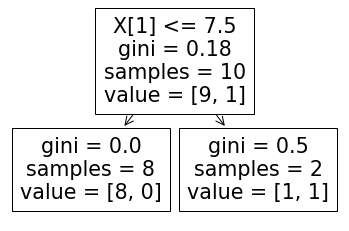

In [36]:
from sklearn.tree import plot_tree
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


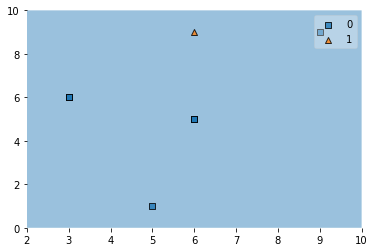

In [37]:
plot_decision_regions(x,y,clf=dt2,legend=True)

In [38]:
df2['y_pred'] = dt2.predict(x)
df2['y_pred']
df2

,X1,X2,label,y_pred
4,5,1,0,0
8,9,9,0,0
5,6,9,1,0
6,6,5,0,0
2,3,6,0,0
6,6,5,0,0
6,6,5,0,0
2,3,6,0,0
2,3,6,0,0
2,3,6,0,0


In [39]:
error2 = calculate_weights_error(0.1)
error2

1.0986122886681098

In [40]:
inp = np.array([6,9]).reshape(1,2)

In [41]:
dt1.predict(inp)

array([1])

In [42]:
dt2.predict(inp)

array([0])